In [19]:
# %%
# Jupyter Notebook cell 1 — Imports
import numpy as np
import pandas as pd

# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "v2/202512_power_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Fluo_pow       = data["A"].to_numpy()
FWHM_pow       = data["fwhm"].to_numpy()
I_pow       = data["intensity"].to_numpy()
S_pow    = data["S"].to_numpy()


# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("Fluo:", Fluo_pow.shape, "→", Fluo_pow[:5])
print("FWHM_pow:", FWHM_pow.shape, "→", FWHM_pow[:5])
print("I:", I_pow.shape, "→", I_pow[:5])
print("S:", S_pow.shape, "→", S_pow[:5])



,A,fwhm,intensity,S
0,300.077240,9.946400e+07,0.320397,0.049505
1,305.815098,1.067719e+08,0.320397,0.050500
2,337.995382,6.795428e+07,0.320397,0.056112
3,132.560962,1.108078e+08,0.091542,0.021281
4,171.386444,6.673294e+07,0.091542,0.027687


Fluo: (56,) → [300.07724022 305.81509767 337.99538171 132.56096206 171.38644418]
FWHM_pow: (56,) → [9.94639960e+07 1.06771883e+08 6.79542836e+07 1.10807840e+08
 6.67329400e+07]
I: (56,) → [0.32039682 0.32039682 0.32039682 0.09154195 0.09154195]
S: (56,) → [0.04950532 0.05049973 0.05611189 0.02128115 0.02768671]


In [20]:
# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "S_parameter_vs_temp.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_pow2       = data["Temperature [K]"].to_numpy()
I_pow2       = data["Intensity [W/cm²]"].to_numpy()
S_pow2       = data["S"].to_numpy()
FWHM_pow2    = data["FWHM [Hz]"].to_numpy()
Gam_pow2 = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo_pow2    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_pow2.shape, "→", T_pow2[:5])
print("I:", I_pow2.shape, "→", I_pow2[:5])
print("S:", S_pow2.shape, "→", S_pow2[:5])
print("FWHM:", FWHM_pow2.shape, "→", FWHM_pow2[:5])
print("Gam_tot:", Gam_pow2.shape, "→", Gam_pow2[:5])
print("Fluo:", Fluo_pow2.shape, "→", Fluo_pow2[:5])


,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.731820,0.428243,0.108321,2.535635e+08,2.408540e+08,15550.338565
1,4.777749,0.428243,0.123954,2.635728e+08,2.486144e+08,17547.096787
2,4.490514,0.428243,0.100211,2.133204e+08,2.033736e+08,14492.044091
3,5.075639,0.856485,0.225183,3.367827e+08,3.042631e+08,29243.322029
4,4.551905,1.712970,0.394787,2.508496e+08,2.124025e+08,45034.647029


T: (49,) → [4.73181998 4.77774867 4.49051393 5.07563945 4.55190483]
I: (49,) → [0.42824258 0.42824258 0.42824258 0.85648516 1.71297031]
S: (49,) → [0.10832125 0.12395445 0.10021059 0.22518313 0.39478694]
FWHM: (49,) → [2.53563457e+08 2.63572818e+08 2.13320427e+08 3.36782713e+08
 2.50849642e+08]
Gam_tot: (49,) → [2.40853984e+08 2.48614391e+08 2.03373581e+08 3.04263100e+08
 2.12402464e+08]
Fluo: (49,) → [15550.33856457 17547.09678679 14492.04409057 29243.32202877
 45034.64702943]


In [21]:
Rinfty = np.amax(Fluo_pow)*1.005
print(Rinfty)
Gam_pow = FWHM_pow/(1+S_pow)**.5

Rinfty2 = np.amax(Fluo_pow2)*1.005
print(Rinfty2)


6361.592008367916
159107.942923358


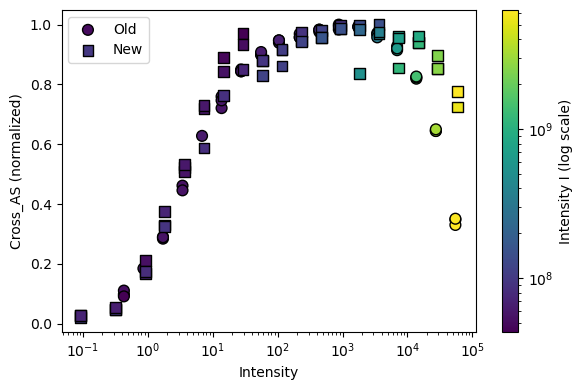

In [79]:
# %%
# (Optional) Example plot with color-coded markers by intensity I (log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute Cross_AS
Cross_AS = Fluo_pow #/ I_pow * Gam_pow / 40e6
Cross_AS = Cross_AS / np.amax(Cross_AS)

# Avoid zero or negative values for log normalization
I_pos = np.clip(Gam_pow, np.min(Gam_pow[Gam_pow > 0]), None)

plt.figure(figsize=(6, 4))

# Compute Cross_AS
Cross_AS2 = Fluo_pow2 #/ I_pow * Gam_pow / 40e6
Cross_AS2 = Cross_AS2 / np.amax(Cross_AS2)
# Avoid zero or negative values for log normalization
I_pos2 = np.clip(Gam_pow2, np.min(Gam_pow2[Gam_pow2 > 0]), None)
sc2 = plt.scatter(
    I_pow2, Cross_AS2,
    c=I_pos2,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_pos2), vmax=np.max(I_pos2)),
    s=60,
    edgecolor='k',
    marker='o',
    label="Old"
)

# Scatter plot with log-scale color normalization
sc = plt.scatter(
    I_pow, Cross_AS,
    c=I_pos,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_pos), vmax=np.max(I_pos)),
    s=60,
    edgecolor='k',
    marker='s',
    label="New"
)





# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Intensity")
plt.ylabel("Cross_AS (normalized)")
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

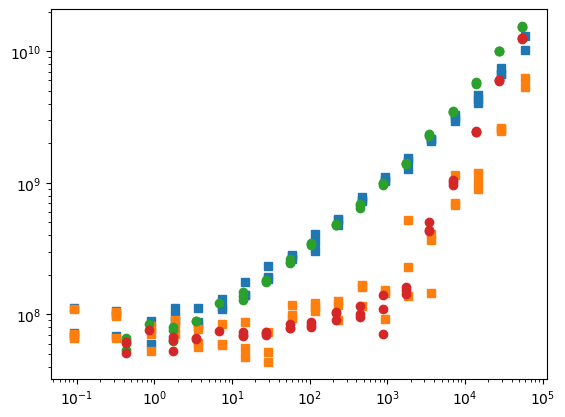

In [80]:
plt.plot(I_pow, FWHM_pow, marker='s', linestyle='none')
plt.plot(I_pow, Gam_pow, marker='s', linestyle='none')

plt.plot(I_pow2, FWHM_pow2/4, marker='o', linestyle='none')
plt.plot(I_pow2, Gam_pow2/4, marker='o', linestyle='none')

plt.xscale('log')
plt.yscale('log')

In [25]:
# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "v2/202512_temperature_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_temp1       = data["temperature"].to_numpy()
I_temp1       = data["intensity"].to_numpy()
S_temp1       = data["S"].to_numpy()
FWHM_temp1    = data["fwhm"].to_numpy()
Fluo_temp1    = data["A"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_temp1.shape, "→", T_temp1[:5])
print("I:", I_temp1.shape, "→", I_temp1[:5])
print("S:", S_temp1.shape, "→", S_temp1[:5])
print("FWHM:", FWHM_temp1.shape, "→", FWHM_temp1[:5])
print("Fluo:", Fluo_temp1.shape, "→", Fluo_temp1[:5])

Gam_temp1 = FWHM_temp1/(1+S_temp1)**.5

,A,fwhm,temperature,intensity,S
0,4179.364970,1.385442e+08,4.1660,6.865646,1.915183
1,3906.119749,1.616217e+08,4.1205,6.865646,1.590781
2,3641.696052,1.315464e+08,4.0290,6.865646,1.338910
3,3663.892454,1.489359e+08,4.2720,6.865646,1.358154
4,3881.023434,1.091647e+08,4.1930,6.865646,1.564570


T: (86,) → [4.166  4.1205 4.029  4.272  4.193 ]
I: (86,) → [6.8656462 6.8656462 6.8656462 6.8656462 6.8656462]
S: (86,) → [1.91518339 1.59078146 1.33891006 1.35815438 1.56457011]
FWHM: (86,) → [1.38544179e+08 1.61621667e+08 1.31546424e+08 1.48935888e+08
 1.09164720e+08]
Fluo: (86,) → [4179.36497049 3906.11974885 3641.69605187 3663.89245435 3881.02343436]


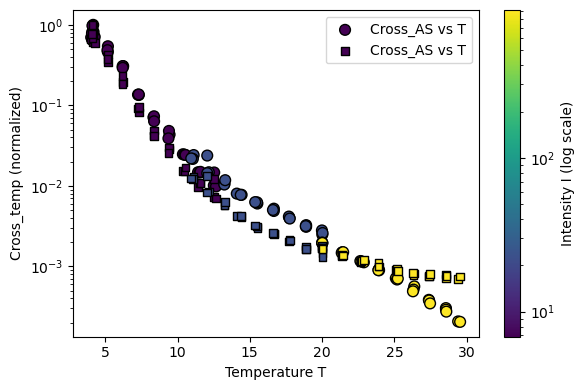

In [93]:
# S in the data set has an offset artificial and it's S+1!!!
# (Optional) Example plot with color-coded markers by intensity I (log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute Cross_AS
#Cross_temp1 = S_temp1 * FWHM_temp1/(1+S_temp1)**.5/I_temp1
Cross_temp1 = S_temp1/I_temp1
Cross_temp1 = Cross_temp1 / np.amax(Cross_temp1)


# Avoid zero or negative values for log normalization
I_postemp1 = np.clip(I_temp1, np.min(I_temp1[I_temp1 > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sctemp1 = plt.scatter(
    T_temp1, Cross_temp1,
    c=I_postemp1,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp1), vmax=np.max(I_postemp1)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

GGT1 = 1/(FWHM_temp1/(1+S_temp1))
GGT1 = GGT1/np.amax(GGT1)
sctemp2 = plt.scatter(
    T_temp1, GGT1,
    c=I_postemp1,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp1), vmax=np.max(I_postemp1)),
    s=30,
    edgecolor='k',
    marker='s',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sctemp1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Cross_temp (normalized)")
plt.yscale('log')
#plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "S_parameter_vs_temp_temp_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_temp2       = data["Temperature [K]"].to_numpy()
I_temp2       = data["Intensity [W/cm²]"].to_numpy()
S_temp2       = data["S"].to_numpy()
FWHM_temp2    = data["FWHM [Hz]"].to_numpy()
Gam_tot_temp2 = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo_temp2    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_temp2.shape, "→", T_temp2[:5])
print("I:", I_temp2.shape, "→", I_temp2[:5])
print("S:", S_temp2.shape, "→", S_temp2[:5])
print("FWHM:", FWHM_temp2.shape, "→", FWHM_temp2[:5])
print("Gam_tot:", Gam_tot_temp2.shape, "→", Gam_tot_temp2[:5])
print("Fluo:", Fluo_temp2.shape, "→", Fluo_temp2[:5])

,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.165629,2.288549,2.002149,1.547998e+08,8.934172e+07,77863.836446
1,4.089000,2.288549,2.034346,1.582756e+08,9.086182e+07,79093.525118
2,3.980500,2.288549,2.153754,1.509551e+08,8.500291e+07,83333.011420
3,4.213500,2.288549,1.995608,1.647924e+08,9.521266e+07,77609.181995
4,4.130500,2.288549,2.006077,1.632949e+08,9.418303e+07,78015.954792


T: (175,) → [4.16562857 4.089      3.9805     4.2135     4.1305    ]
I: (175,) → [2.28854873 2.28854873 2.28854873 2.28854873 2.28854873]
S: (175,) → [2.00214896 2.03434604 2.15375429 1.99560828 2.00607655]
FWHM: (175,) → [1.54799806e+08 1.58275600e+08 1.50955081e+08 1.64792415e+08
 1.63294920e+08]
Gam_tot: (175,) → [89341716.5720993  90861816.68499056 85002913.03275909 95212661.9386006
 94183029.81320918]
Fluo: (175,) → [77863.8364458  79093.52511789 83333.01141986 77609.18199536
 78015.95479158]


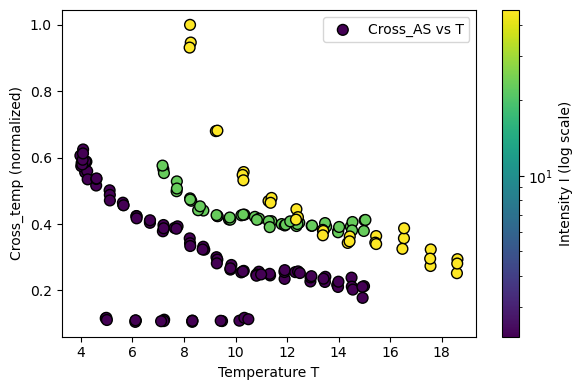

In [29]:
Snew_temp2 = Fluo_temp2/Rinfty2/(1-Fluo_temp2/Rinfty2)
#Snew_temp2 = S_temp2


# Compute Cross_AS
Cross_temp_new2 = Snew_temp2 * Gam_tot_temp2/I_temp2 #*(1+Snew_temp)**.5
Cross_temp_new2 = Cross_temp_new2 / np.amax(Cross_temp_new2)

# Avoid zero or negative values for log normalization
I_postemp2 = np.clip(I_temp2, np.min(I_temp2[I_temp2 > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sctemp = plt.scatter(
    T_temp2, Cross_temp_new2,
    c=I_postemp2,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp2), vmax=np.max(I_postemp2)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sctemp)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Cross_temp (normalized)")
#plt.yscale('log')
#plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

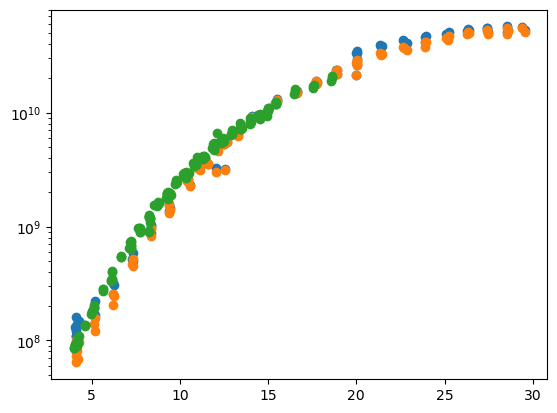

In [52]:
plt.plot(T_temp1, FWHM_temp1, marker='o', linestyle='none')
plt.plot(T_temp1, Gam_temp1, marker='o', linestyle='none')
plt.plot(T_temp2, Gam_tot_temp2, marker='o', linestyle='none')


plt.yscale('log')

In [53]:
import numpy as np
from scipy.interpolate import interp1d

# Your data: numpy arrays
# T_temp : array of T values
# Gam_temp : array of Gamma(T) values

# 1. Sort data by T (interp1d requires increasing x)
idx = np.argsort(T_temp1)
T_sorted1 = T_temp1[idx]
Gam_sorted1 = Gam_temp1[idx]

# 2. Interpolating Gamma(T)
Gamma_of_T1 = interp1d(
    T_sorted1,
    Gam_sorted1,
    kind='cubic',          # or 'linear' if you prefer
    bounds_error=False,    # avoids error outside data range
    fill_value="extrapolate"
)

# 3. (Optional but recommended) Check monotonicity of Gamma(T)
dGam1 = np.diff(Gam_sorted1)
is_increasing = np.all(dGam1 > 0)
is_decreasing = np.all(dGam1 < 0)

if not (is_increasing or is_decreasing):
    print("Warning: Gamma(T) is not monotonic -> T(Gamma) will not be single-valued.")

# 4. Build the inverse interpolant T(Gamma)
#    Here we just swap x and y: x = Gamma, y = T
T_of_Gamma1 = interp1d(
    Gam_sorted1,
    T_sorted1,
    kind='cubic',
    bounds_error=False,
    fill_value="extrapolate"
)

In [54]:
T_pow1 = T_of_Gamma1(Gam_pow)

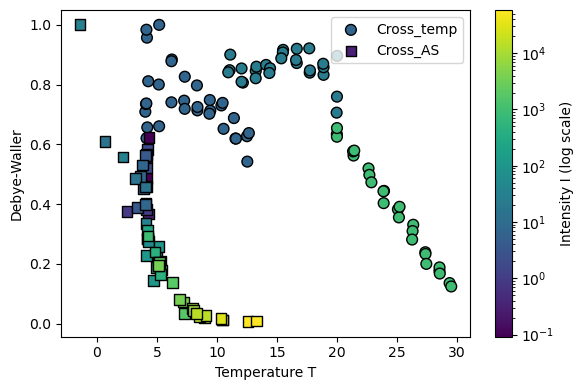

In [55]:
# %%
# Combined plot of Cross_temp_new and Cross_AS (single panel, shared log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# --- First dataset (temp)
#Snew_temp = Fluo_temp / Rinfty / (1 - Fluo_temp / Rinfty)
Cross_temp_new1 = S_temp1 * Gam_temp1 / I_temp1
Cross_temp_new1 = Cross_temp_new1 / np.amax(Cross_temp_new1)
I_postemp1 = np.clip(I_temp1, np.min(I_temp1[I_temp1 > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_pow / I_pow * Gam_pow )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_pow, np.min(I_pow[I_pow > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp1), np.min(I_pos))
vmax = max(np.max(I_postemp1), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_temp1, Cross_temp_new1,
    c=I_postemp1,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Cross_temp"
)

sc2 = plt.scatter(
    T_pow1, Cross_AS,
    c=I_pos,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Cross_AS"
)

# --- Colorbar and labels
cbar = plt.colorbar(sc1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Debye-Waller")
#plt.yscale('log') 
#plt.xscale('log') 
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
print(np.amin(T_pow1))

-1.4230454260495102


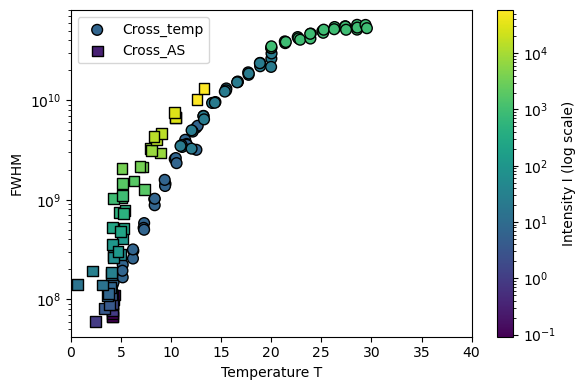

In [57]:

# --- First dataset (temp)
Snew_temp1 = Fluo_temp1 / Rinfty / (1 - Fluo_temp1 / Rinfty)
Cross_temp_new1 = Snew_temp1 * Gam_temp1 / I_temp1
Cross_temp_new1 = Cross_temp_new1 / np.amax(Cross_temp_new1)
I_postemp1 = np.clip(I_temp1, np.min(I_temp1[I_temp1 > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_pow / I_pow * Gam_pow )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_pow, np.min(I_pow[I_pow > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp1), np.min(I_pos))
vmax = max(np.max(I_postemp1), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_temp1, FWHM_temp1,
    c=I_postemp1,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Cross_temp"
)

sc2 = plt.scatter(
    T_pow1, FWHM_pow,
    c=I_pos,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Cross_AS"
)

# --- Colorbar and labels
cbar = plt.colorbar(sc1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("FWHM")
plt.yscale('log') 
#plt.xscale('log') 
plt.xlim(0,40)
#plt.ylim(0,1e10)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
T_pow2 = T_of_Gamma1(Gam_pow2)

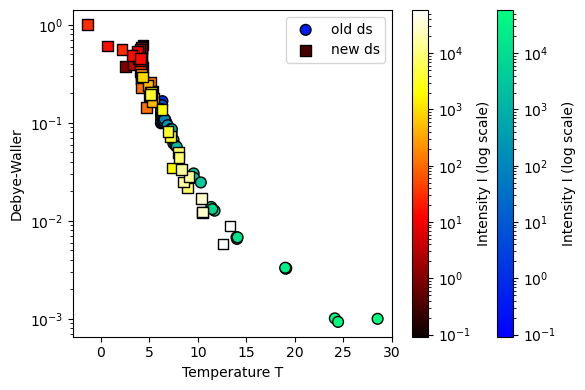

In [82]:

# --- First dataset (temp)
#Snew_temp = Fluo_temp / Rinfty / (1 - Fluo_temp / Rinfty)
Cross_temp_new1 = S_pow2 * Gam_pow2 / I_pow2
Cross_temp_new1 = Cross_temp_new1 / np.amax(Cross_temp_new1)
I_postemp1 = np.clip(I_pow2, np.min(I_pow2[I_pow2 > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_pow / I_pow * Gam_pow )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_pow, np.min(I_pow[I_pow > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp1), np.min(I_pos))
vmax = max(np.max(I_postemp1), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_pow2, Cross_temp_new1/6,
    c=I_postemp1,
    cmap='winter',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="old ds"
)

sc2 = plt.scatter(
    T_pow1, Cross_AS,
    c=I_pos,
    cmap='hot',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="new ds"
)



"""sctemp = plt.scatter(
    T_temp2, Cross_temp_new2/10,
    c=I_postemp2,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp2), vmax=np.max(I_postemp2)),
    s=20,
    edgecolor='k',
    marker='^',
    label="Cross_AS vs T"
)"""

# --- Colorbar and labels
cbar1 = plt.colorbar(sc1)
cbar1.set_label("Intensity I (log scale)")

cbar2 = plt.colorbar(sc2)
cbar2.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Debye-Waller")
#plt.ylim(0,0.4)
plt.yscale('log') 
#plt.xscale('log') 
plt.legend()
plt.tight_layout()
plt.show()